In [17]:
import numpy as np
from graph_helpers import visualize_adjacency, visualize_map, visualize_costs, visualize_path

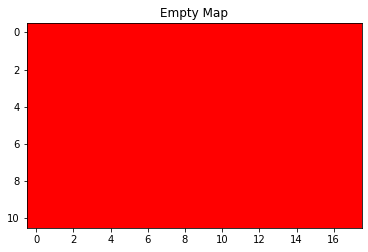

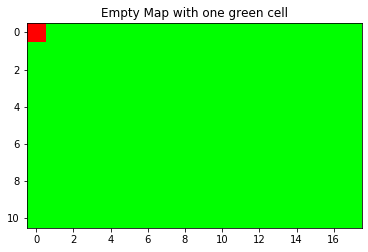

In [18]:
a = np.zeros((11, 18))
visualize_map("Empty Map", a)

b = np.zeros((11, 18))
b[0, 0] = 1

def flipped_cmap(x):
    if x == 0:
        return [0, 255, 0]
    else:
        return [255, 0, 0]

visualize_map("Empty Map with one green cell", b, cmap=flipped_cmap)

#visualize_map("Empty Map with one green cell", data=flipped_I cmap)



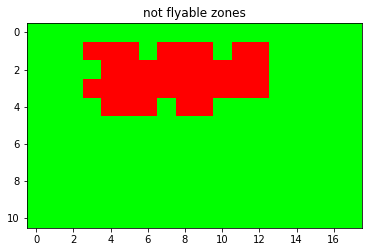

In [19]:
data = np.ones((11, 18))
data[1, 3:6] = 0
data[1, 7:10] = 0
data[1, 11:13] = 0
data[2, 4:13] = 0
data[3, 3:13] = 0
data[4, 4:7] = 0
data[4, 8:10] = 0



def flipped_cmap(x):
    if x == 0:
        return [0, 255, 0]
    else:
        return [255, 0, 0]


#visualize_map("not flyable zones", data2)
visualize_map("not flyable zones", data)

In [20]:
def vertex_of_cell(M, i, j):
    """Get the vertex of a cell

    Args:
        M (np.ndarray): the map we are working with.
        i (int): the row index.
        j (int): the column index.
    """
    assert len(M.shape) == 2
    m, n = M.shape
    # YOUR CODE HERE
    # ***** Start of your code *****
    return n * i + j 
    # ***** End of your code *****
    
def cell_of_vertex(M, k):
    """Get cell corresponding to the vertex.

    Args:
        M (np.ndarray): the map we are working with.
        i (int): the row index.
        j (int): the column index.
    """
    assert len(M.shape) == 2
    m, n = M.shape
    
    # YOUR CODE HERE
    # ***** Start of your code *****
    return np.array([k // n, k % n])
    # ***** End of your code *****

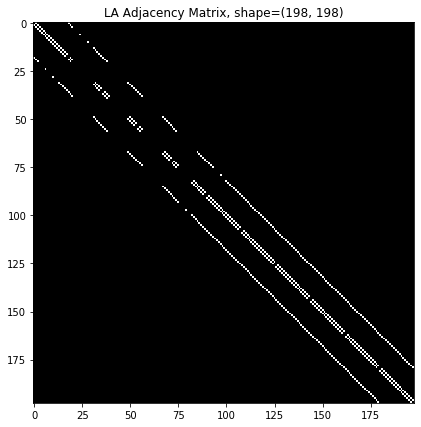

In [21]:
def adjacency_matrix(M, flyable=1):
    """Visualize a 2D array using matplotlib.
    All inputs values should be normalized 0.0-1.0.

    Args:
        M (np.ndarray): the map we are working with.
        flyable (int): what number indicates a flyable cell; defauls to 1.
    """
    assert len(M.shape) == 2
    # Size of map
    m, n = M.shape
    
    # Number of vertices
    o = m * n
    
    # A for *A*djacency matrix
    A = np.zeros((o, o))
    
    # YOUR CODE HERE
    # ~~START DELETE~~

    for i in range(0, m):
        for j in range(0, n):
            
            # check up
            if i != 0 and M[i, j] == flyable and M[i-1, j] == flyable:
                A[vertex_of_cell(M, i, j), vertex_of_cell(M, i-1, j)] = 1.
                    
            # check left
            if j != 0 and M[i, j] == flyable and M[i, j-1] == flyable:
                A[vertex_of_cell(M, i, j), vertex_of_cell(M, i, j-1)] = 1.
            
            # check down
            if i != m-1 and M[i, j] == flyable and M[i+1, j] == flyable:
                A[vertex_of_cell(M, i, j), vertex_of_cell(M, i+1, j)] = 1.
               
            # check right
            if j != n-1 and M[i, j] == flyable and M[i, j+1] == flyable:
                A[vertex_of_cell(M, i, j), vertex_of_cell(M, i, j+1)] = 1.
                
    # ~~END DELETE~~
    
    return A


la_adjacency = adjacency_matrix(data)
visualize_adjacency("LA Adjacency Matrix", la_adjacency)

In [22]:
def neighbors(A, k):
    """Get the neighbors of vertex `i`
    
    Args:
        A (np.ndarray): Adjacency matrix
        i (int): vertex we care about.
    """
    assert len(A.shape) == 2
    assert A.shape[0] == A.shape[1]
    
    # we have o vertices
    o = A.shape[0]
    assert k < o
    
    # ~~START DELETE~~
    return [j for j in range(o) if A[k, j] == 1] 
    # ~~END DELETE~~

In [23]:

def push(q, elem):
    """Add an element to the queue
    
    Args:
        q (list): the queue.
        elem (Any): the element to add.
    """
    # YOUR CODE HERE
    # ~~START DELETE~~
    q.append(elem)
    # ~~END DELETE~~
    
def pop(q):
    """Get an element from a queue, if there are any.
       Return the queue (updated) AND the element.
       If there is nothing in the queue, return the queue and the value None.
    
    Args:
        q (list): the queue.
    """
    
    # YOUR CODE HERE
    # ~~START DELETE~~
    if len(q) > 0:
        r = q[0]
        return q[1:], r
    else:
        return q, None
    # ~~END DELETE~~

def popelem(q, e):
    counter = 0 
    hello = -1
    while (counter<len(q)):
        current = q[counter]
        value = current[0]
        if (value == e):
            hello = counter
            break
        counter += 1
    if (hello >= 0):
        elem = q[hello]
        q.pop(hello)
        return elem
    return None

def priority_pop(q):
    counter = 0
    costvalue = q[counter]
    value = costvalue[1]
    shortest = value
    hello = 0
        
    while (counter<len(q)-1):
        current = q[counter + 1]
        value = current[1]
        
        if (value < shortest):
            shortest=value
            hello = counter + 1
        counter += 1
    e = q[hello]
    q = q.pop(hello)
    return e


#test_list = np.array([(1,5), (3, 4), (5, 6)])

test_list = [(1,5), (3, 4), (5, 6), (7, 2)]
#priority_pop(test_list)
#priority_pop(test_list)
#e, test_list = priority_pop(test_list)
#print(e)



#test to see if the code prints out the least set out of the array based on the second number of the set

#e =  priority_pop(test_list)
#print(e, test_list)

#e = priority_pop(test_list)
#print(e, test_list)


#e = priority_pop(test_list)
#print(e, test_list)

(7, 2) [(1, 5), (3, 4), (5, 6)]
(3, 4) [(1, 5), (5, 6)]
(1, 5) [(5, 6)]


In [52]:
#la_start = [4, 4]
#la_end = [3, 10]
def uniform_cost_search(A, start, goal):
    """Perform a breadth first search, returning distances from nodes.
       If goal is specified, return costs once goal is found.
       If the distance to the node is np.inf, then the nodes are unconnected in the graph.
    
    Args:
        A (np.ndarray): Adjacency matrix representing graph to search.
        start (int): vertex to start search at.
        goal (int): vertex indicating goal node.
    """
    # o is the number of nodes
    o = A.shape[0]
    #print("Number of nodes is", o)
     
    # costs (or distances of path to node)
    # inf represents that these nodes are not connected.
    costs = np.inf * np.ones((o,))
    
    # Begin our search at start node start, which is distance 0
    queue = [(start, 0)]

    
    # Dictionary of nodes we have already seen.
    # keys are ints, and values are booleans.
    seen = {}

    # YOUR CODE HERE
    # ~~START DELETE~~

    while len(queue) > 0:
        #print(queue)
        queue, (current, cost) = pop(queue)
        seen[current] = True
        costs[current] = cost
        
        
        #print(len(seen))
        
        if goal == current:
            #print("Found goal!")
            return costs
        for neighbor in neighbors(A, current):
            if neighbor in seen:
                continue
            push(queue, (neighbor, cost+1))
    # ~~END DELETE~~
    return costs





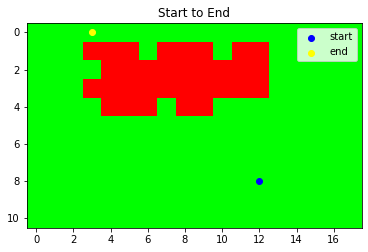

In [53]:
#la_start = [0, 0]
#la_end = [9, 3]
la_start = [8, 12]
la_end = [0, 3]
visualize_map("Start to End", data, start=la_start, end=la_end)

In [61]:

la_start_vertex = vertex_of_cell(data, la_start[0], la_start[1])
la_end_vertex = vertex_of_cell(data, la_end[0], la_end[1])

#print(la_start_vertex)
#print(la_end_vertex)

la_costs = uniform_cost_search(
    la_adjacency,
    la_start_vertex,
    la_end_vertex,
)

In [56]:
import time
start_time = time.time()
for i in range(1):
    la_costs = uniform_cost_search(la_adjacency, la_start_vertex, la_end_vertex)
print("Uniform Cost Search Runtime:", (time.time() - start_time), "seconds")

Uniform Cost Search Runtime: 2.637716054916382 seconds


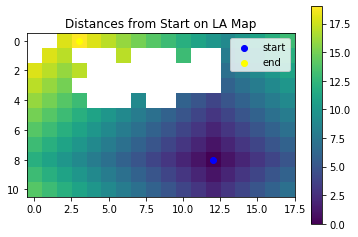

In [51]:
visualize_costs(
    "Distances from Start on LA Map", 
    data, 
    la_costs, 
    start=la_start,
    end=la_end,
)


In [29]:
def shortest_neighbor(A, costs, k):
    """Find the neighbor to vertex `k` with the shortest distance.
    
    Args:
        A (np.ndarray): Adjacency matrix representing graph.
        costs (np.ndarray): costs to each vertex from some start node.
        k (int): vertex whose neighbors we should consider
    """
    # YOUR CODE HERE
    # ~~START DELETE~~
    best_neighbor = None
    best_cost = np.inf
    for neighbor in neighbors(A, k):
        if costs[neighbor] < best_cost:
            best_neighbor = neighbor
            best_cost = costs[neighbor]
    return best_neighbor
    # ~~END DELETE~~

In [30]:
def shortest_path(A, costs, start, goal):
    """Find the shortest_path to goal from start. Costs are distances from start.
    
    Args:
        A (np.ndarray): Adjacency matrix representing graph.
        costs (np.ndarray): costs (distances) to each vertex from `start`.
        start (int): vertex to start at.
        goal (int): vertex to reach.
    """
    
    # YOUR CODE HERE
    # ~~START DELETE~~
    
    if goal == start:
        return [goal]
    
    path = [goal]
    
    
    best_neighbor = shortest_neighbor(A, costs, goal)
    path.append(best_neighbor)
    while best_neighbor != start:
        best_neighbor = shortest_neighbor(A, costs, best_neighbor)
        path.append(best_neighbor)

    path.reverse()
    return path
    # ~~END DELETE~~

In [31]:
la_path = shortest_path(
    la_adjacency, 
    la_costs, 
    la_start_vertex, 
    la_end_vertex,
)
print(la_path)

[156, 138, 120, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 75, 74, 56, 38, 20, 2, 3]


In [44]:
def dijkstra(A, start):
    """Perform a breadth first search, returning distances from nodes.
       If goal is specified, return costs once goal is found.
       If the distance to the node is np.inf, then the nodes are unconnected in the graph.
    
    Args:
        A (np.ndarray): Adjacency matrix representing graph to search.
        start (int): vertex to start search at.
        goal (int): vertex indicating goal node.
    """
    # o is the number of nodes
    o = A.shape[0]
    #print("Number of nodes is", o)
     
    # costs (or distances of path to node)
    # inf represents that these nodes are not connected.
    costs = np.inf * np.ones((o,))
    
    # Begin our search at start node start, which is distance 0
    queue = [(start, 0)]
    previous = np.zeros((o,))
    previous[start] = start
    costs[start] = 0
    
    # Dictionary of nodes we have already seen.
    # keys are ints, and values are booleans.
    seen = {}
    x = 1
    # YOUR CODE HERE
    # ~~START DELETE~~

    while len(queue) > 0:
        #print(queue)
        (current, cost) = priority_pop(queue)

        for neighbor in neighbors(A, current):
            if costs[neighbor]>cost+1:
                costs[neighbor] = cost+1
                previous[neighbor]= current
                popelem(queue, neighbor)
                push(queue, (neighbor, cost+1))
                
           # if neighbor in seen:
            #    continue
            
    # ~~END DELETE~~
    return costs, previous
    #return previous
    #return costs

In [45]:
la_dijkstra = dijkstra(
    la_adjacency, 
    la_start_vertex, 
)
print(la_dijkstra)

import time
start_time = time.time()
for i in range(5000):
    la_dijkstra = dijkstra(la_adjacency, la_start_vertex)
print("Dijkstra Search Runtime:", (time.time() - start_time), "seconds")


(array([20., 19., 18., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,
        9., 10., 11., 12., 13., 19., 18., 17., inf, inf, inf, 17., inf,
       inf, inf, 13., inf, inf,  8.,  9., 10., 11., 12., 18., 17., 16.,
       17., inf, inf, inf, inf, inf, inf, inf, inf, inf,  7.,  8.,  9.,
       10., 11., 17., 16., 15., inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf,  6.,  7.,  8.,  9., 10., 16., 15., 14., 13., inf, inf,
       inf,  9., inf, inf,  6.,  5.,  4.,  5.,  6.,  7.,  8.,  9., 15.,
       14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  4.,
        5.,  6.,  7.,  8., 14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,
        5.,  4.,  3.,  2.,  3.,  4.,  5.,  6.,  7., 13., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  2.,  3.,  4.,  5.,
        6., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,
        0.,  1.,  2.,  3.,  4.,  5., 13., 12., 11., 10.,  9.,  8.,  7.,
        6.,  5.,  4.,  3.,  2.,  1.,  2.,  3.,  4.,  5.,  6., 1

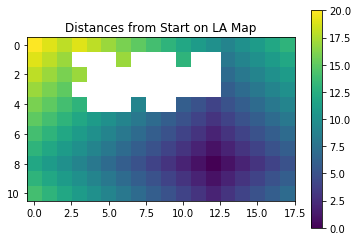

In [58]:
#visualize the costs using dijkstra
visualize_costs("Distances from Start on LA Map", data, la_dijkstra[0])

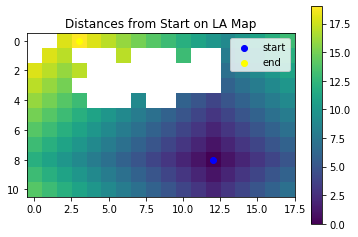

In [37]:
#visualize the costs in general using la_costs
visualize_costs(
    "Distances from Start on LA Map", 
    data, 
    la_costs, 
    start=la_start,
    end=la_end,
)